In [1]:
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, Flatten, Dense

2024-11-09 13:57:04.213044: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-09 13:57:04.216493: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-09 13:57:04.226871: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731157024.245004   26486 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731157024.250596   26486 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-09 13:57:04.270163: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
classifier = Sequential()
# convultional
classifier.add(Conv2D(32, kernel_size=(3, 3), input_shape=(64, 64, 3), activation='relu'))
# maxpooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# flattening
classifier.add(Flatten())
# full connection
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))

/home/ariel/PycharmProjects/enronmails/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1731157319.381261   26486 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,936,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,937,409 (15.02 MB)

 Trainable params: 3,937,409 (15.02 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
# Image Data Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, rescale=1./255, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory('training_set', target_size=(64, 64), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory('test_set', target_size=(64, 64), batch_size=32, class_mode='binary')

Found 8048 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [11]:
# training
model = classifier.fit(train_generator, epochs=5, validation_data=test_generator)

Epoch 1/5
252/252 ━━━━━━━━━━━━━━━━━━━━ 32s 128ms/step - accuracy: 0.6433 - loss: 0.6306 - val_accuracy: 0.6790 - val_loss: 0.6009
Epoch 2/5
252/252 ━━━━━━━━━━━━━━━━━━━━ 32s 128ms/step - accuracy: 0.6512 - loss: 0.6212 - val_accuracy: 0.6455 - val_loss: 0.6349
Epoch 3/5
252/252 ━━━━━━━━━━━━━━━━━━━━ 32s 127ms/step - accuracy: 0.6573 - loss: 0.6257 - val_accuracy: 0.6795 - val_loss: 0.5930
Epoch 4/5
252/252 ━━━━━━━━━━━━━━━━━━━━ 33s 129ms/step - accuracy: 0.6588 - loss: 0.6086 - val_accuracy: 0.7145 - val_loss: 0.5655
Epoch 5/5
252/252 ━━━━━━━━━━━━━━━━━━━━ 32s 127ms/step - accuracy: 0.6621 - loss: 0.6034 - val_accuracy: 0.6815 - val_loss: 0.5907


In [12]:
model.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

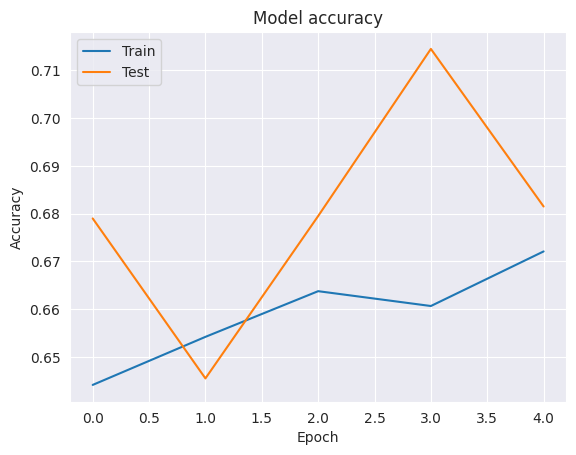

In [14]:
import matplotlib.pyplot as plt
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

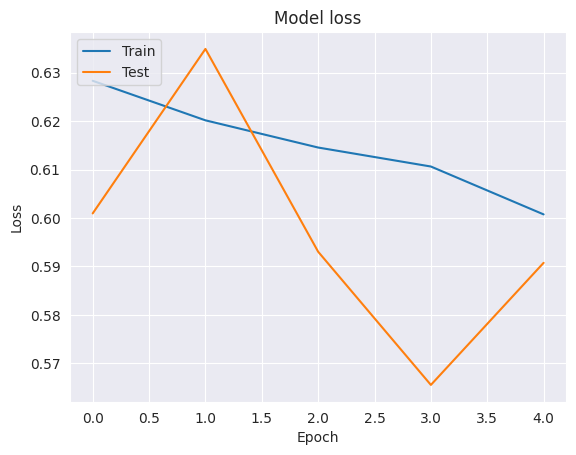

In [15]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [16]:
import numpy as np
import keras.utils as image

In [24]:
test_image = image.load_img('single_prediction/test2.jpg', target_size=(64, 64))

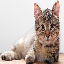

In [25]:
test_image

In [26]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

In [27]:
result = classifier.predict(test_image)
result = result.astype('int')
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[1]])

In [28]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [29]:
for key, value in train_generator.class_indices.items():
    if result == value:
        print(key)

dogs
